<a href="https://colab.research.google.com/github/andrix17/proWine/blob/main/notebook/ProWine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ProWine Project
## Analisi Descrittiva
Script R per analisi descrittiva delle varietà dei vini usando un dataset di recensioni preso da Kaggle https://www.kaggle.com/zynicide/wine-reviews

In [2]:
install.packages("lsa")
install.packages("tm")
install.packages("RWeka")
install.packages("stopwords")
library(tm)
library(lsa)
library(RWeka)
library(stopwords)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘SnowballC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘slam’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RWekajars’, ‘rJava’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘ISOcodes’


Loading required package: NLP

Loading required package: SnowballC


Attaching package: ‘stopwords’


The following object is masked from ‘package:tm’:

    stopwords




In [3]:
download.file('https://raw.githubusercontent.com/andrix17/proWine/main/dataset/winemag-data-130k-v2.csv?token=AMASMT6SWWUQDUY3EEZJWD3AGZUK6','wineData.csv')

In [4]:
wineData <- read.csv('wineData.csv')

In [5]:
head(wineData)

,X,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0,Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",Vulkà Bianco,87,NA,Sicily & Sardinia,Etna,,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
2,1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",Avidagos,87,15,Douro,,,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
3,2,US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",,87,14,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
4,3,US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",Reserve Late Harvest,87,13,Michigan,Lake Michigan Shore,,Alexander Peartree,,St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),Riesling,St. Julian
5,4,US,"Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",Vintner's Reserve Wild Child Block,87,65,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),Pinot Noir,Sweet Cheeks
6,5,Spain,"Blackberry and raspberry aromas show a typical Navarran whiff of green herbs and, in this case, horseradish. In the mouth, this is fairly full bodied, with tomatoey acidity. Spicy, herbal flavors complement dark plum fruit, while the finish is fresh but grabby.",Ars In Vitro,87,15,Northern Spain,Navarra,,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra),Tempranillo-Merlot,Tandem


In [6]:
variety = wineData$variety
reviews = wineData$description
length(variety)==length(reviews)

[1] TRUE

In [7]:
head(sort(table(variety), decreasing = T))

variety
              Pinot Noir               Chardonnay       Cabernet Sauvignon 
                   13272                    11753                     9472 
               Red Blend Bordeaux-style Red Blend                 Riesling 
                    8946                     6915                     5189 

In [8]:
corpus <- Corpus(VectorSource(reviews))
inspect(corpus[1:5])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.                                                                             
[2] This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  already drinkable, although it will certainly be better from 2016.                      
[3] Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.                                                               
[4] Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled gua

In [9]:
corpus <- tm_map(corpus, tolower)
inspect(corpus[1:5])

Warning message in tm_map.SimpleCorpus(corpus, tolower):
“transformation drops documents”


<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] aromas include tropical fruit, broom, brimstone and dried herb. the palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.                                                                             
[2] this is ripe and fruity, a wine that is smooth while still structured. firm tannins are filled out with juicy red berry fruits and freshened with acidity. it's  already drinkable, although it will certainly be better from 2016.                      
[3] tart and snappy, the flavors of lime flesh and rind dominate. some green pineapple pokes through, with crisp acidity underscoring the flavors. the wine was all stainless-steel fermented.                                                               
[4] pineapple rind, lemon pith and orange blossom start off the aromas. the palate is a bit more opulent, with notes of honey-drizzled gua

In [10]:
stopwordlist <- stopwords::stopwords("en", source= "nltk")#Snowball, marimo, nltk, stopwords-iso, smart
corpus <- tm_map(corpus, removeWords, stopwordlist)
inspect(corpus[1:5])

Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwordlist):
“transformation drops documents”


<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] aromas include tropical fruit, broom, brimstone  dried herb.  palate  overly expressive, offering unripened apple, citrus  dried sage alongside brisk acidity.                                                   
[2]   ripe  fruity,  wine   smooth  still structured. firm tannins  filled   juicy red berry fruits  freshened  acidity.   already drinkable, although   certainly  better  2016.                                    
[3] tart  snappy,  flavors  lime flesh  rind dominate.  green pineapple pokes ,  crisp acidity underscoring  flavors.  wine   stainless-steel fermented.                                                             
[4] pineapple rind, lemon pith  orange blossom start   aromas.  palate   bit  opulent,  notes  honey-drizzled guava  mango giving way   slightly astringent, semidry finish.                                         
[5] much like  regular bottling  2012,  come

In [11]:
corpus <- tm_map(corpus, removePunctuation)
inspect(corpus[1:5])

Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
“transformation drops documents”


<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] aromas include tropical fruit broom brimstone  dried herb  palate  overly expressive offering unripened apple citrus  dried sage alongside brisk acidity                                                 
[2]   ripe  fruity  wine   smooth  still structured firm tannins  filled   juicy red berry fruits  freshened  acidity   already drinkable although   certainly  better  2016                                 
[3] tart  snappy  flavors  lime flesh  rind dominate  green pineapple pokes   crisp acidity underscoring  flavors  wine   stainlesssteel fermented                                                           
[4] pineapple rind lemon pith  orange blossom start   aromas  palate   bit  opulent  notes  honeydrizzled guava  mango giving way   slightly astringent semidry finish                                       
[5] much like  regular bottling  2012  comes across  rather rough  tannic  r

In [12]:
tdmc <- TermDocumentMatrix(corpus)

In [13]:
tdmc

<<TermDocumentMatrix (terms: 43754, documents: 129971)>>
Non-/sparse entries: 3125556/5683625578
Sparsity           : 100%
Maximal term length: 47
Weighting          : term frequency (tf)

In [14]:
3125556/(5683625578+3125556)*100 #percentuale di elementi non nulli

[1] 0.05496207

In [15]:
tdmTemp <- removeSparseTerms(tdmc, 0.995)
tdmTemp

<<TermDocumentMatrix (terms: 764, documents: 129971)>>
Non-/sparse entries: 2338681/96959163
Sparsity           : 98%
Maximal term length: 15
Weighting          : term frequency (tf)

In [16]:
words <- rownames(tdmTemp)
words

[1] "acidity"         "alongside"       "apple"           "aromas"         
  [5] "brisk"           "citrus"          "dried"           "fruit"          
  [9] "herb"            "include"         "offering"        "palate"         
 [13] "sage"            "tropical"        "2016"            "already"        
 [17] "although"        "berry"           "better"          "certainly"      
 [21] "drinkable"       "firm"            "fruits"          "fruity"         
 [25] "juicy"           "red"             "ripe"            "smooth"         
 [29] "still"           "structured"      "tannins"         "wine"           
 [33] "crisp"           "dominate"        "fermented"       "flavors"        
 [37] "green"           "lime"            "pineapple"       "rind"           
 [41] "tart"            "astringent"      "bit"             "blossom"        
 [45] "finish"          "giving"          "lemon"           "mango"          
 [49] "notes"           "opulent"         "orange"          "pith"           
 [53] "slightly"        "start"           "way"             "across"         
 [57] "bottling"        "comes"           "earthy"          "good"           
 [61] "hearty"          "herbal"          "like"            "much"           
 [65] "rather"          "rough"           "rustic"          "tannic"         
 [69] "blackberry"      "bodied"          "dark"            "fairly"         
 [73] "fresh"           "full"            "grabby"          "herbs"          
 [77] "mouth"           "plum"            "raspberry"       "show"           
 [81] "spicy"           "typical"         "whiff"           "balanced"       
 [85] "bright"          "candied"         "carry"           "opens"          
 [89] "pepper"          "savory"          "soft"            "white"          
 [93] "dry"             "food"            "offers"          "restrained"     
 [97] "spice"           "texture"         "accent"          "elegant"        
[101] "peach"           "thyme"           "depth"           "drink"          
[105] "flavor"          "great"           "pear"            "touch"          
[109] "attractive"      "cabernet"        "chocolate"       "coffee"         
[113] "end"             "finishing"       "merlot"          "oaky"           
[117] "strong"          "structure"       "supple"          "aftertaste"     
[121] "almost"          "character"       "layered"         "mineral"        
[125] "strongly"        "taut"            "tight"           "well"           
[129] "accented"        "backbone"        "black"           "chalky"         
[133] "cherry"          "oak"             "otherwise"       "rich"           
[137] "throughout"      "whole"           "bean"            "coconut"        
[141] "dominated"       "drying"          "espresso"        "give"           
[145] "roasted"         "together"        "vanilla"         "approachable"   
[149] "aroma"           "california"      "classic"         "cut"            
[153] "everyday"        "range"           "six"             "style"          
[157] "toward"          "winery"          "years"           "appeal"         
[161] "easy"            "lean"            "racy"            "refreshing"     
[165] "riesling"        "yet"             "zesty"           "accents"        
[169] "baked"           "balance"         "balsamic"        "compact"        
[173] "features"        "peppery"         "redberry"        "set"            
[177] "tobacco"         "weight"          "blackcherry"     "feel"           
[181] "finishes"        "hot"             "meaty"           "profile"        
[185] "raw"             "simple"          "time"            "charred"        
[189] "clove"           "fullbodied"      "leather"         "mint"           
[193] "nose"            "top"             "wood"            "back"           
[197] "blend"           "crushed"         "franc"           "menthol"        
[201] "ready"           "sauvignon"       "ample"           "berries"        
[205] "currant"         

In [17]:
tdm <-as.matrix(tdmTemp)

In [18]:
tdmPesata <-lw_logtf(tdm) * ( 1 - entropy( tdm ) )

In [19]:
lsar <- lsa(tdmPesata)

In [20]:
length(lsar$sk)

[1] 304

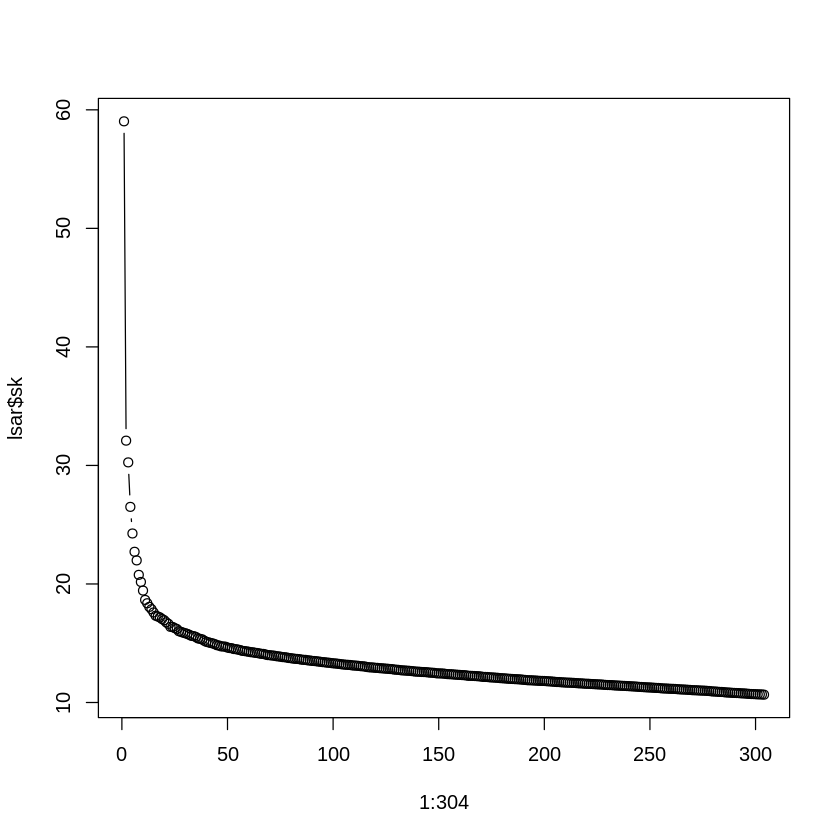

In [21]:
plot(1:304, lsar$sk, type="b")

In [22]:
tls <- lsar$tk %*% diag(lsar$sk)
dls <- lsar$dk %*% diag(lsar$sk)

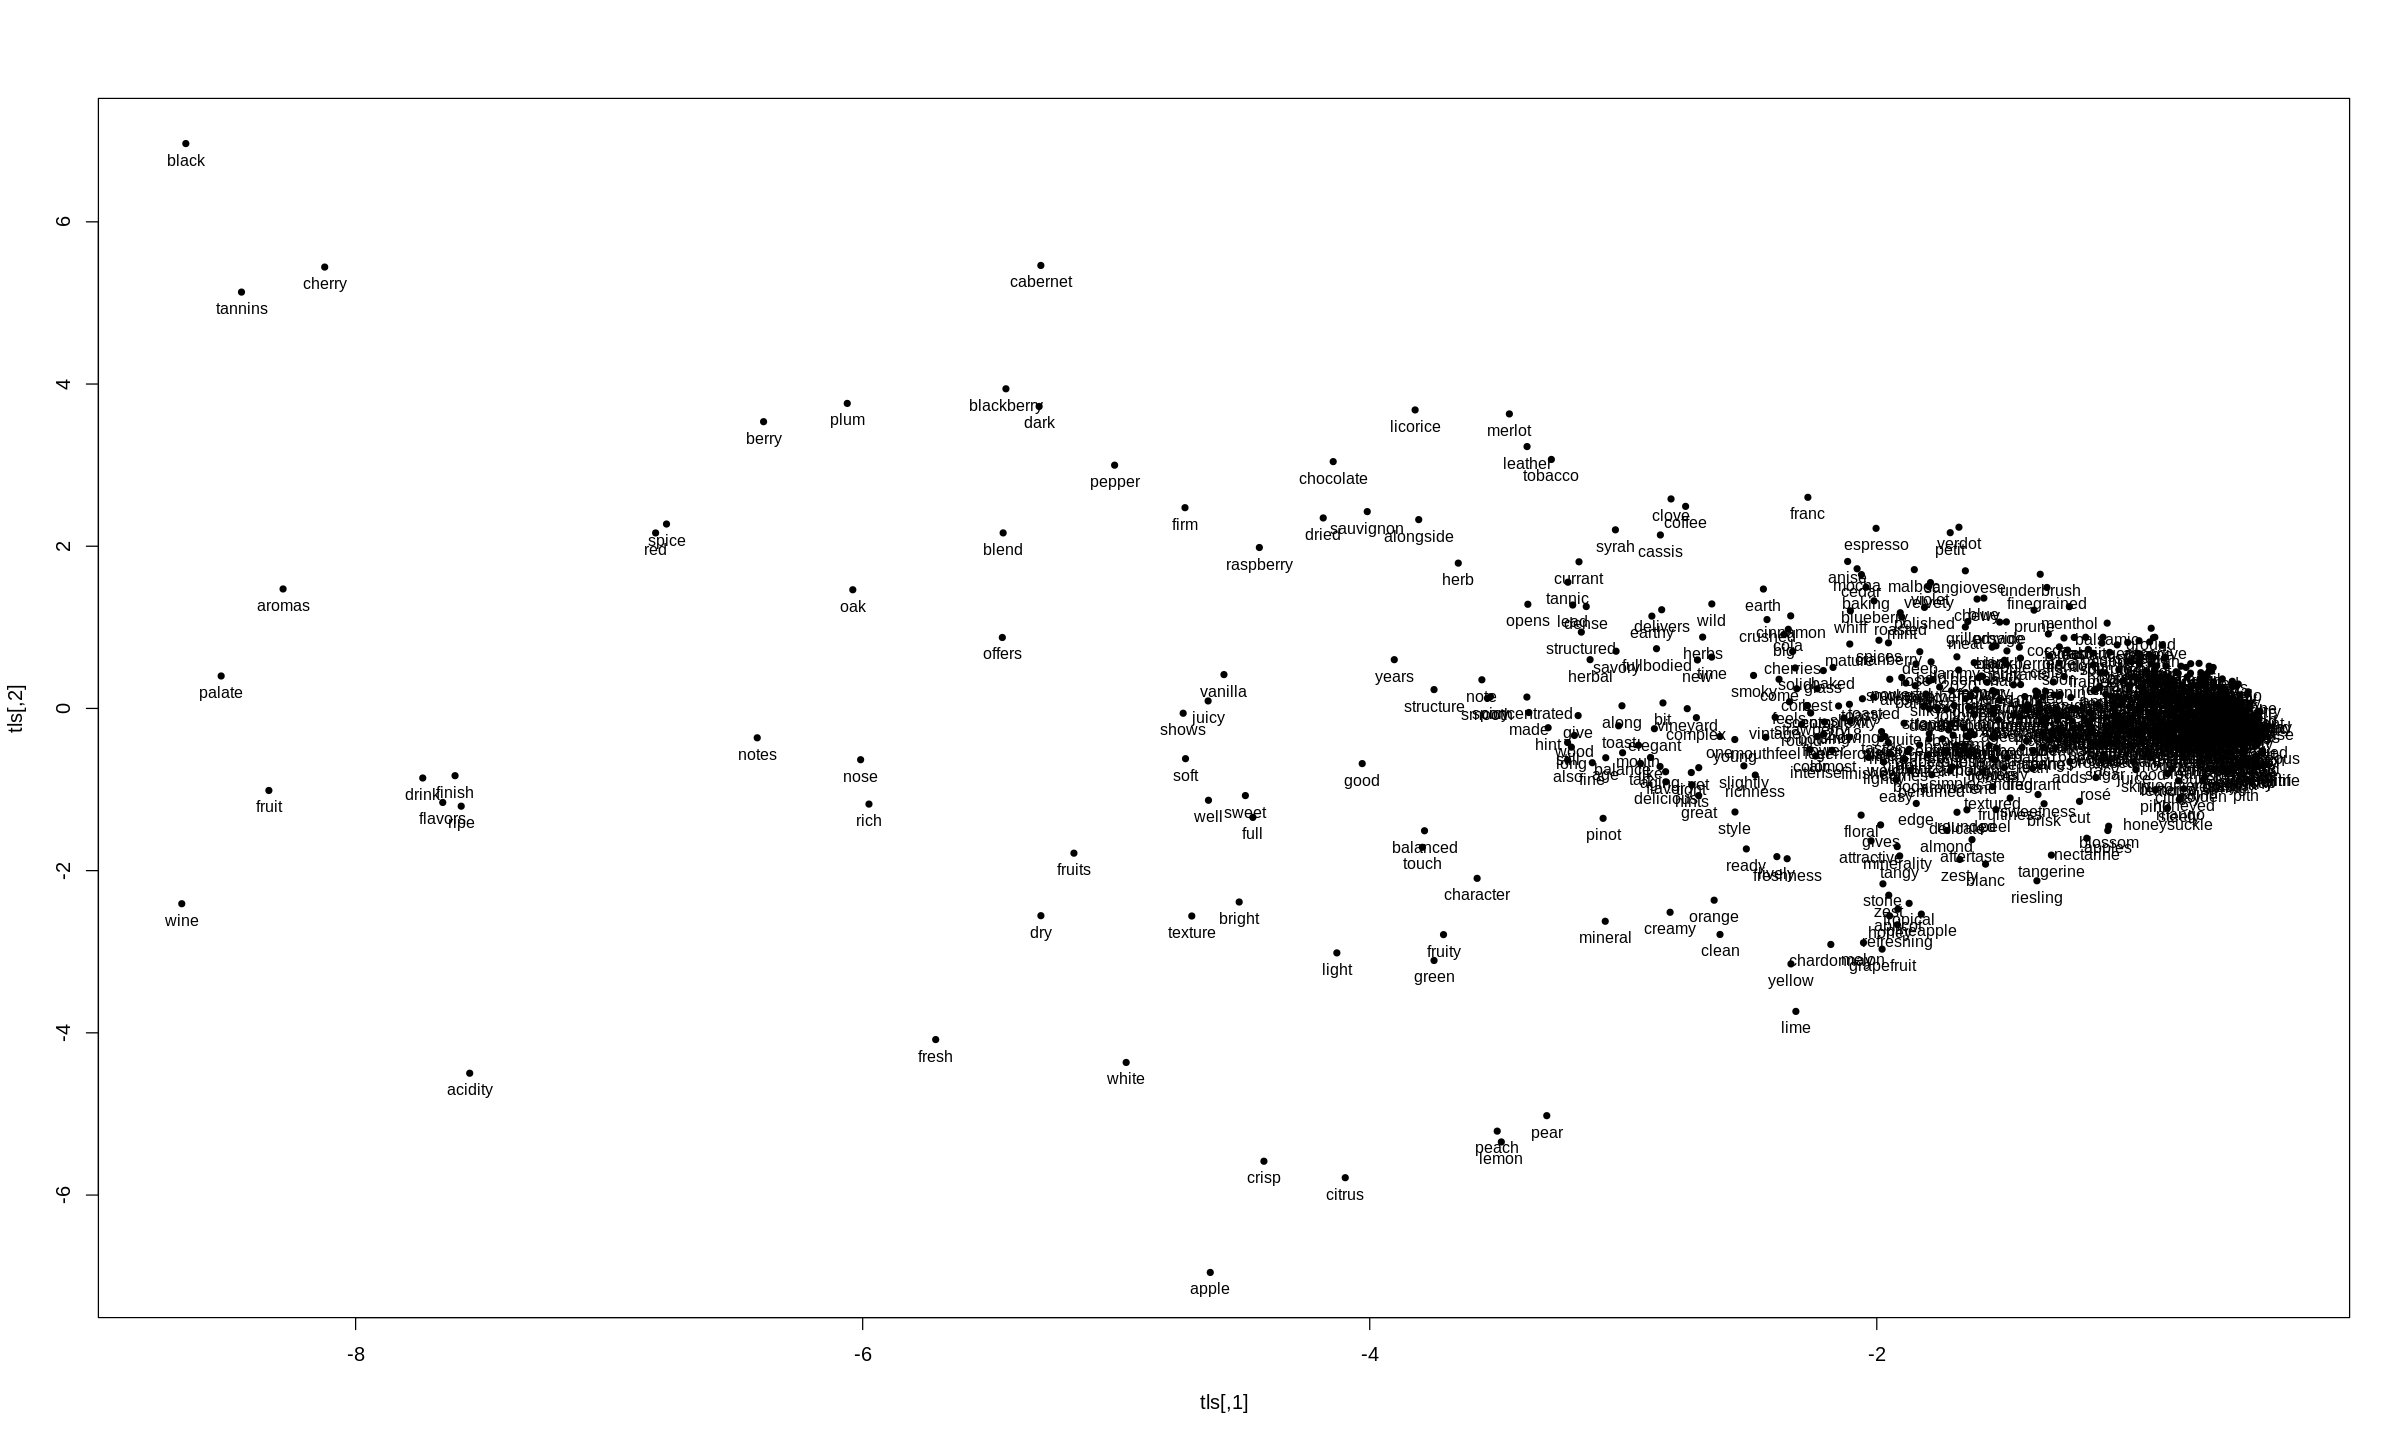

In [23]:
options(repr.plot.width=20, repr.plot.height=12)
plot(tls, pch=20)
text(tls,labels=words, cex=0.8, pos=1)
points(0,0,pch=20,cex=3,col="red")

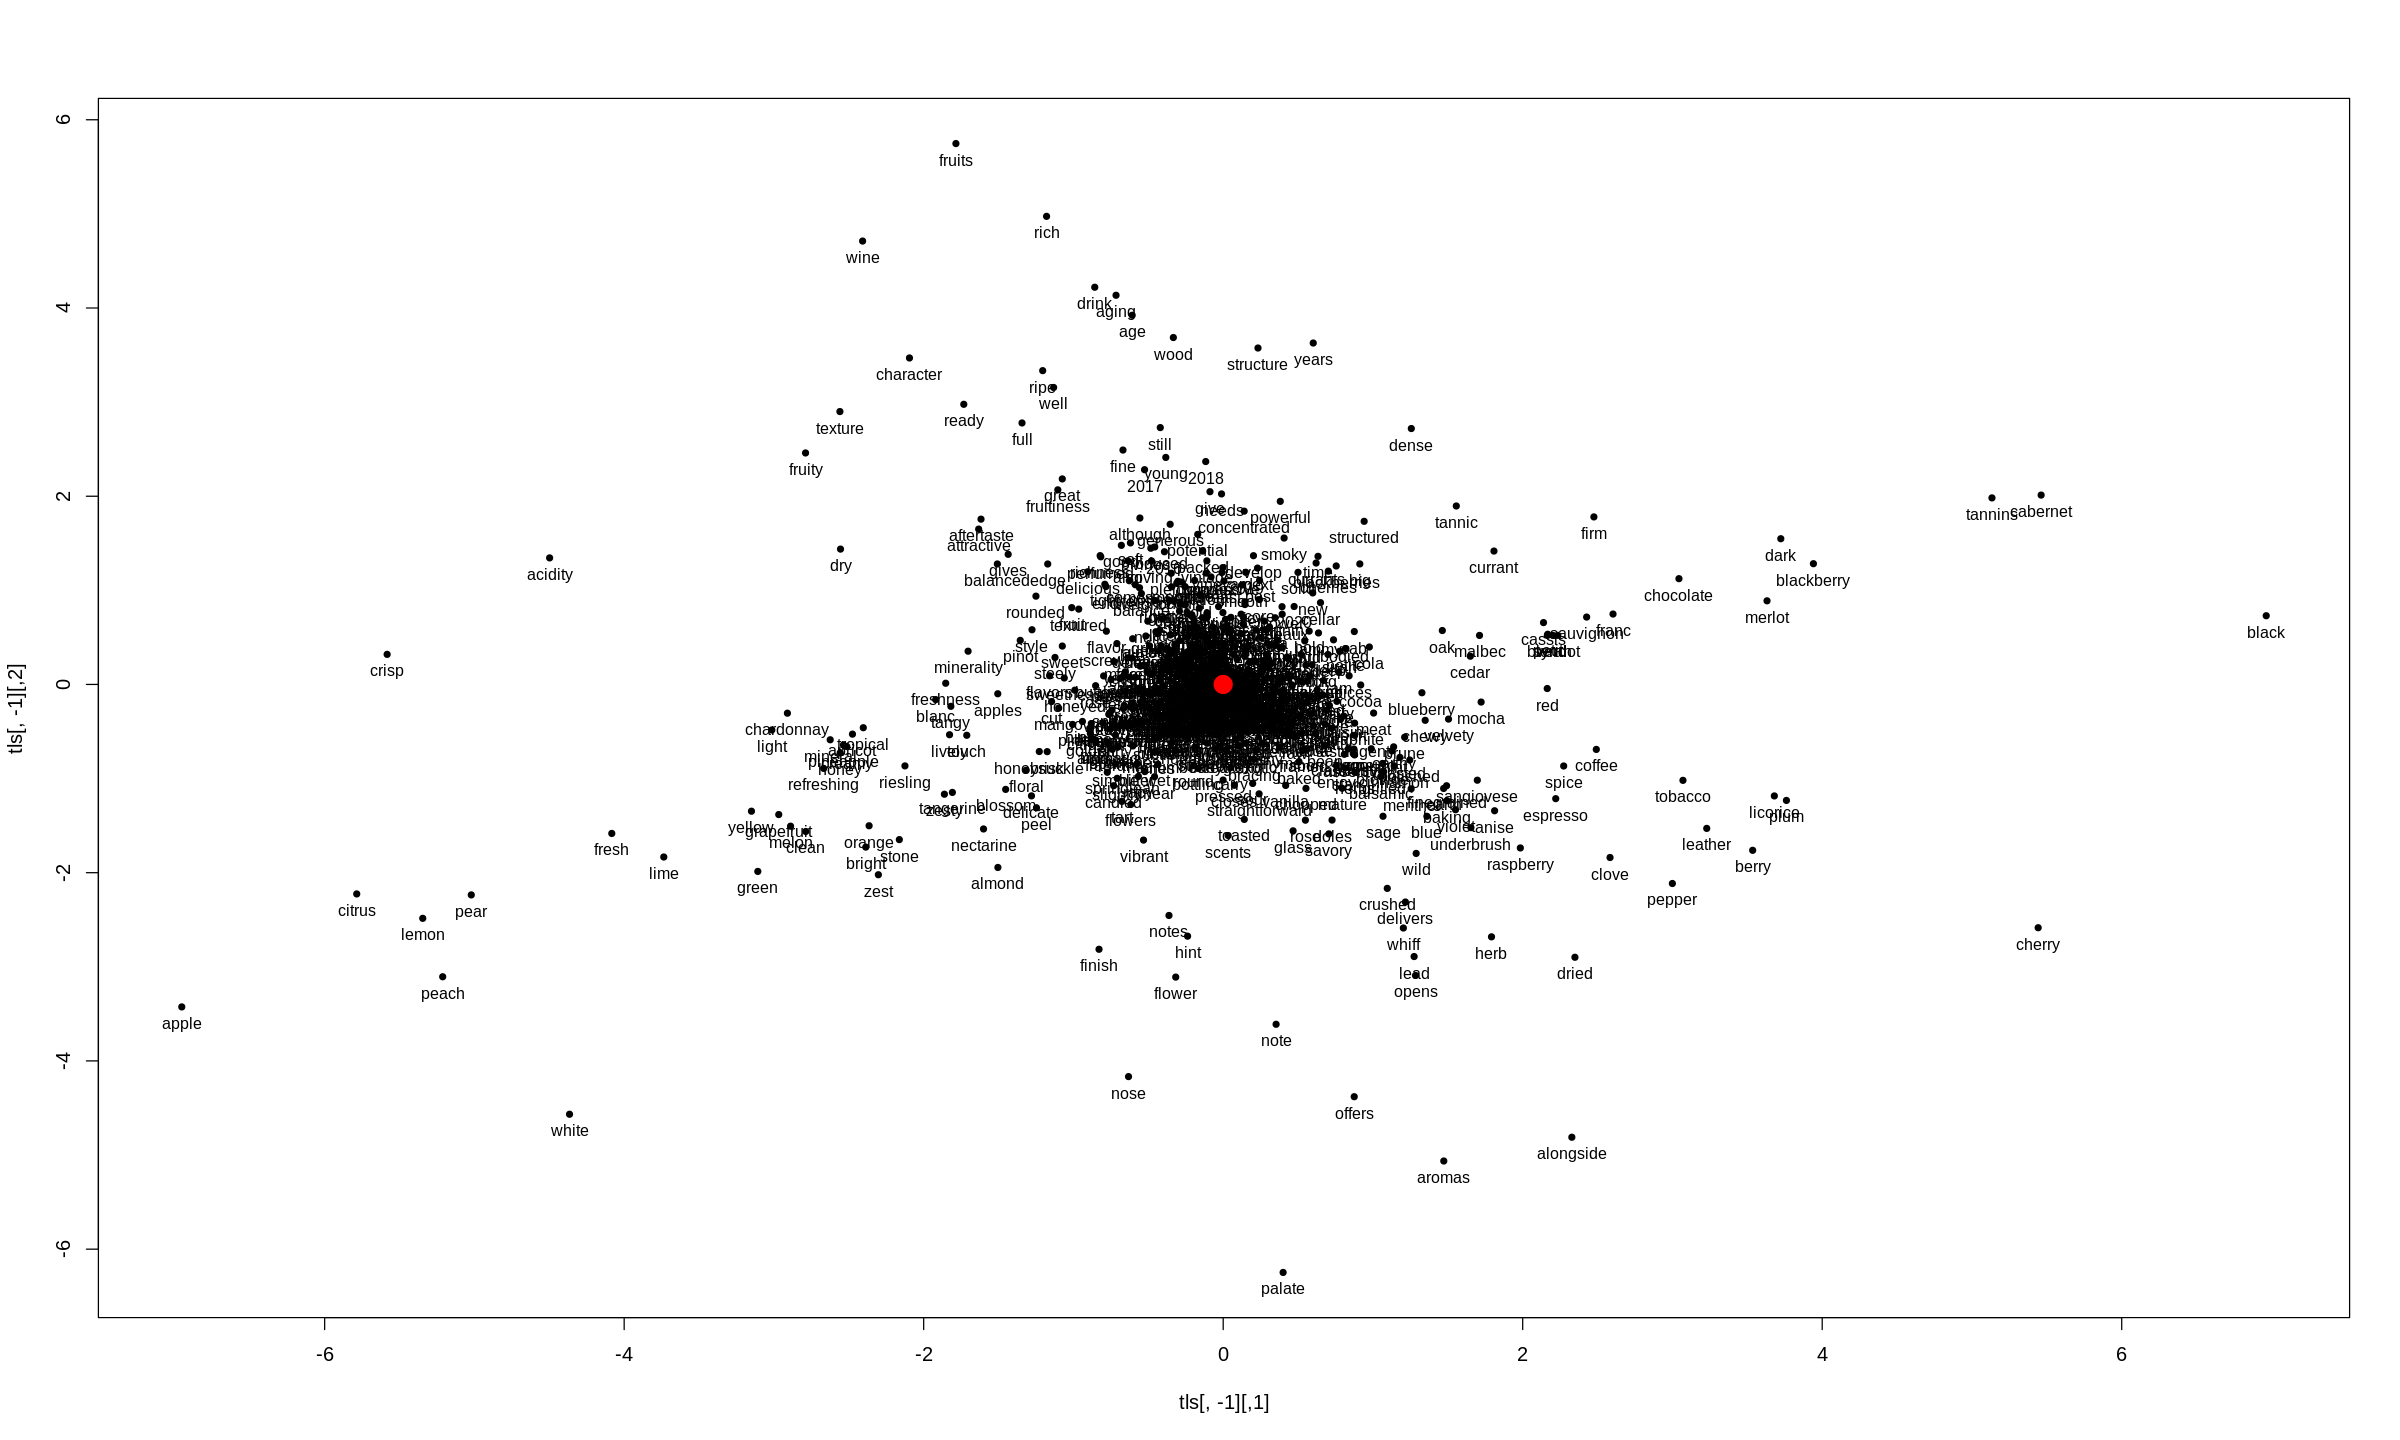

In [24]:
plot(tls[,-1], pch=20)
text(tls[,-1],labels=words, cex=0.8, pos=1)
points(0,0,pch=20,cex=3,col="red")

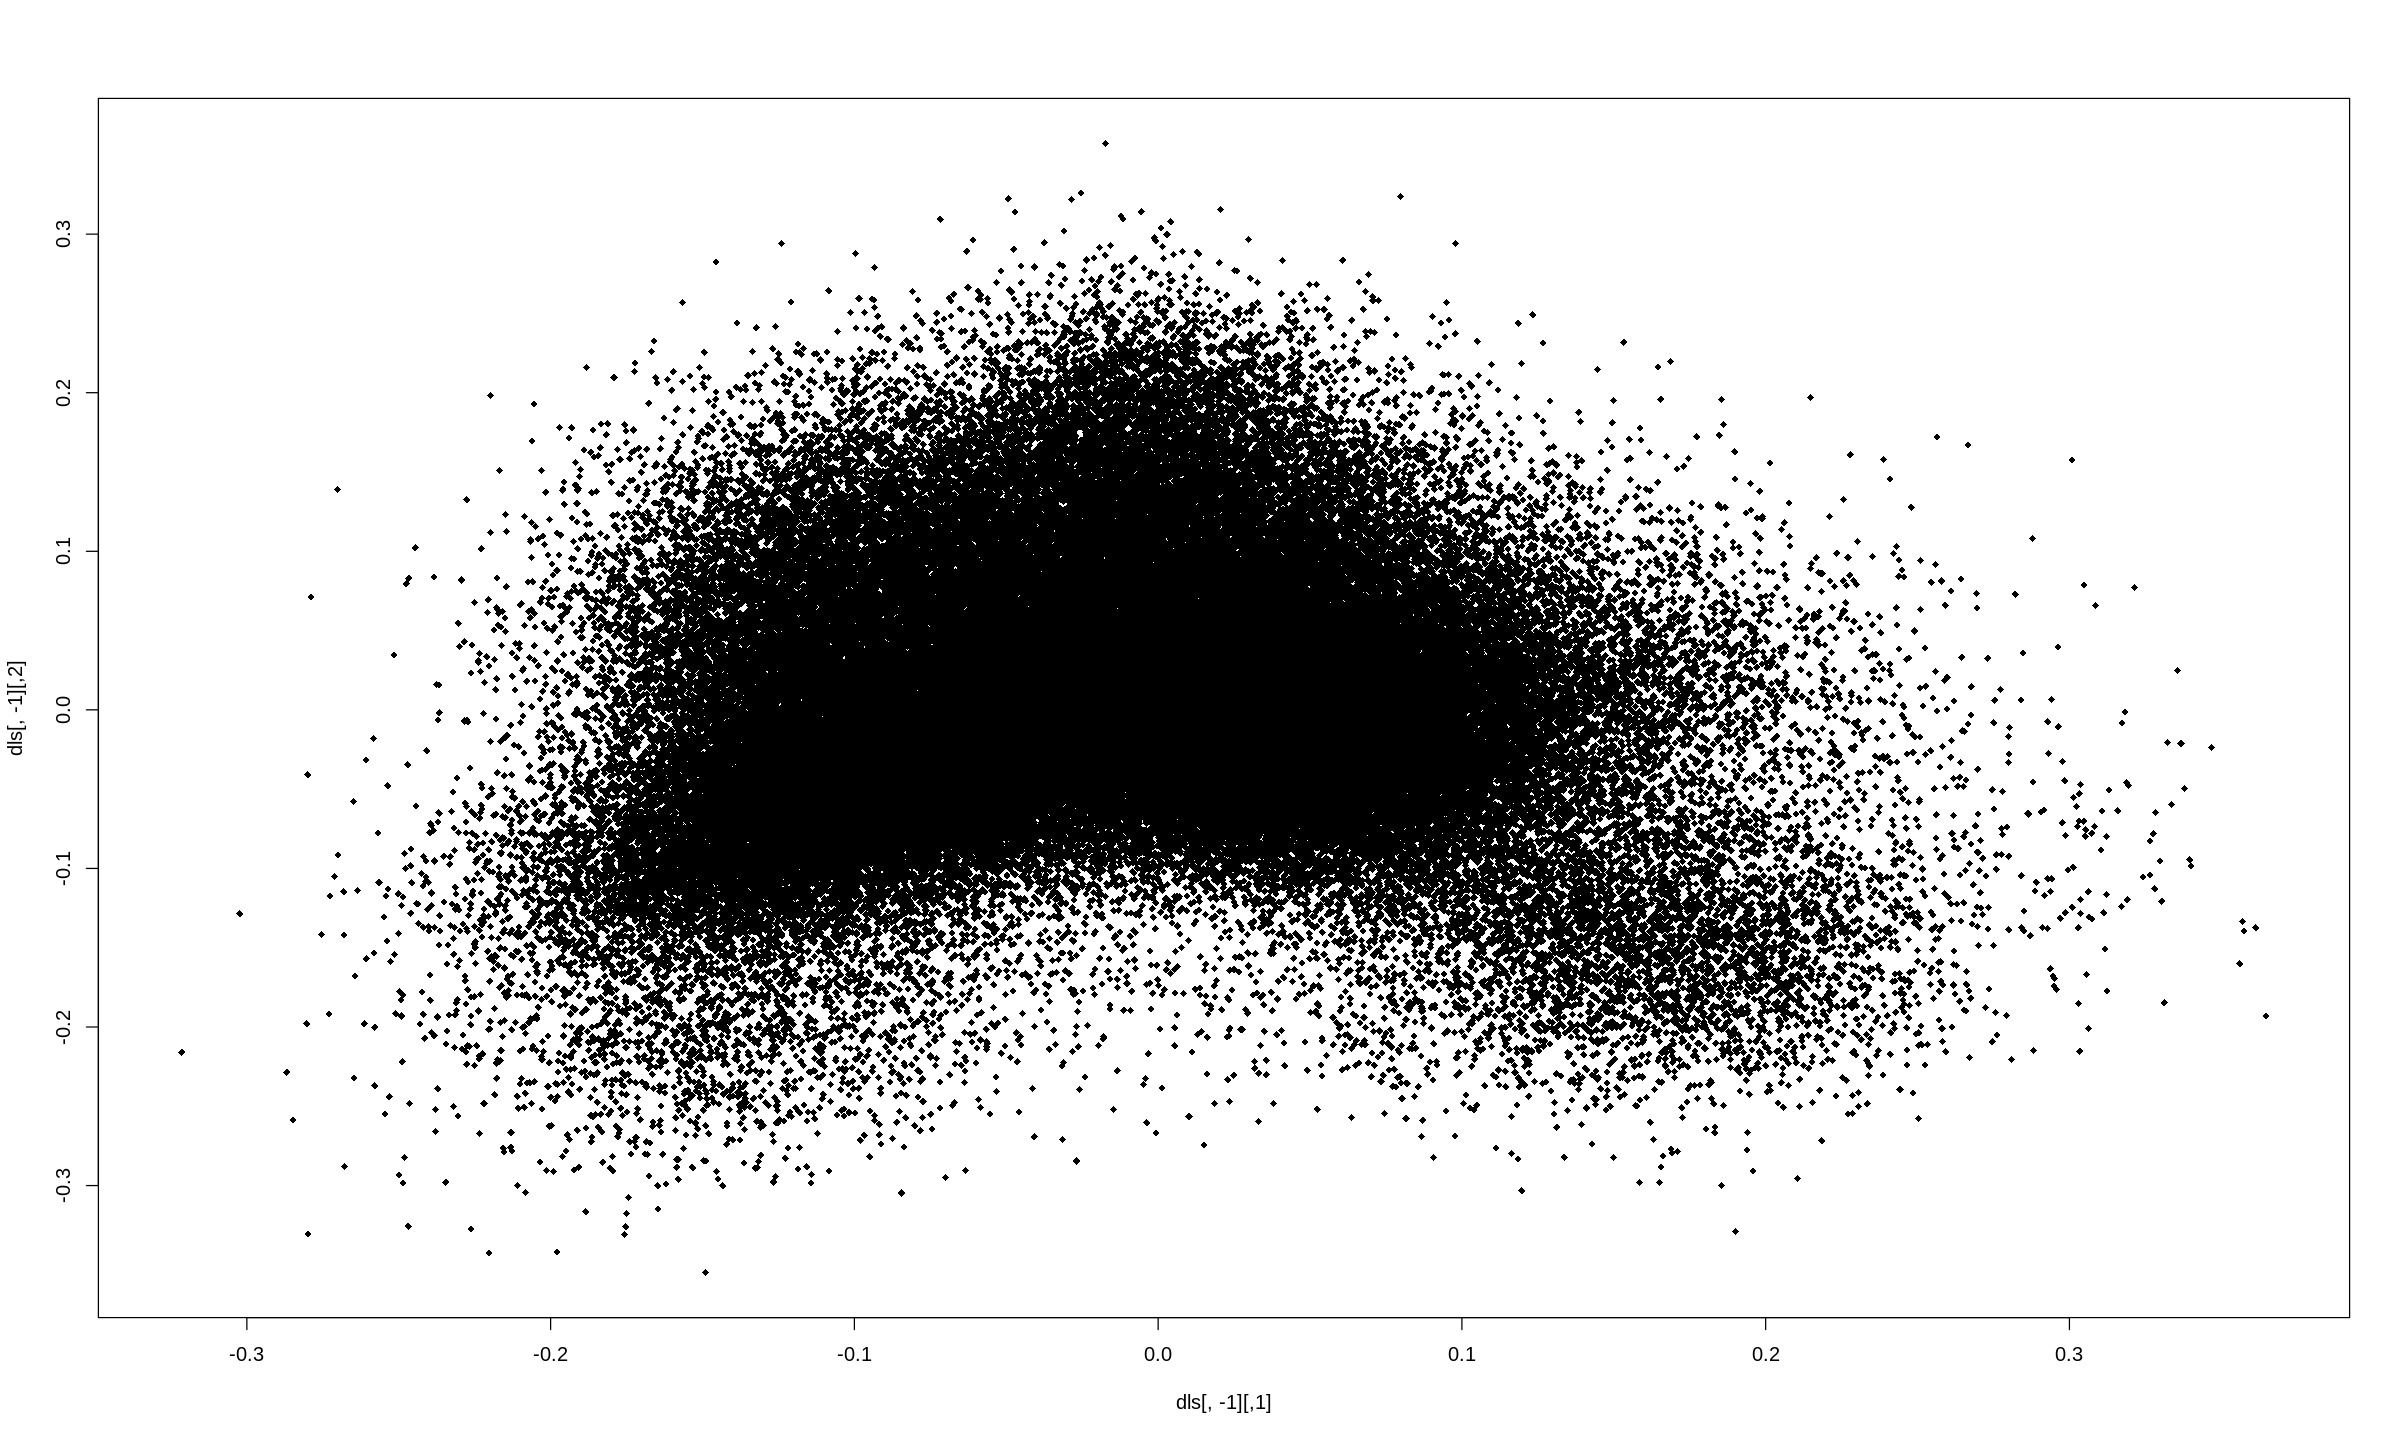

In [25]:
plot( dls[,-1], pch=18, cex=0.8 )

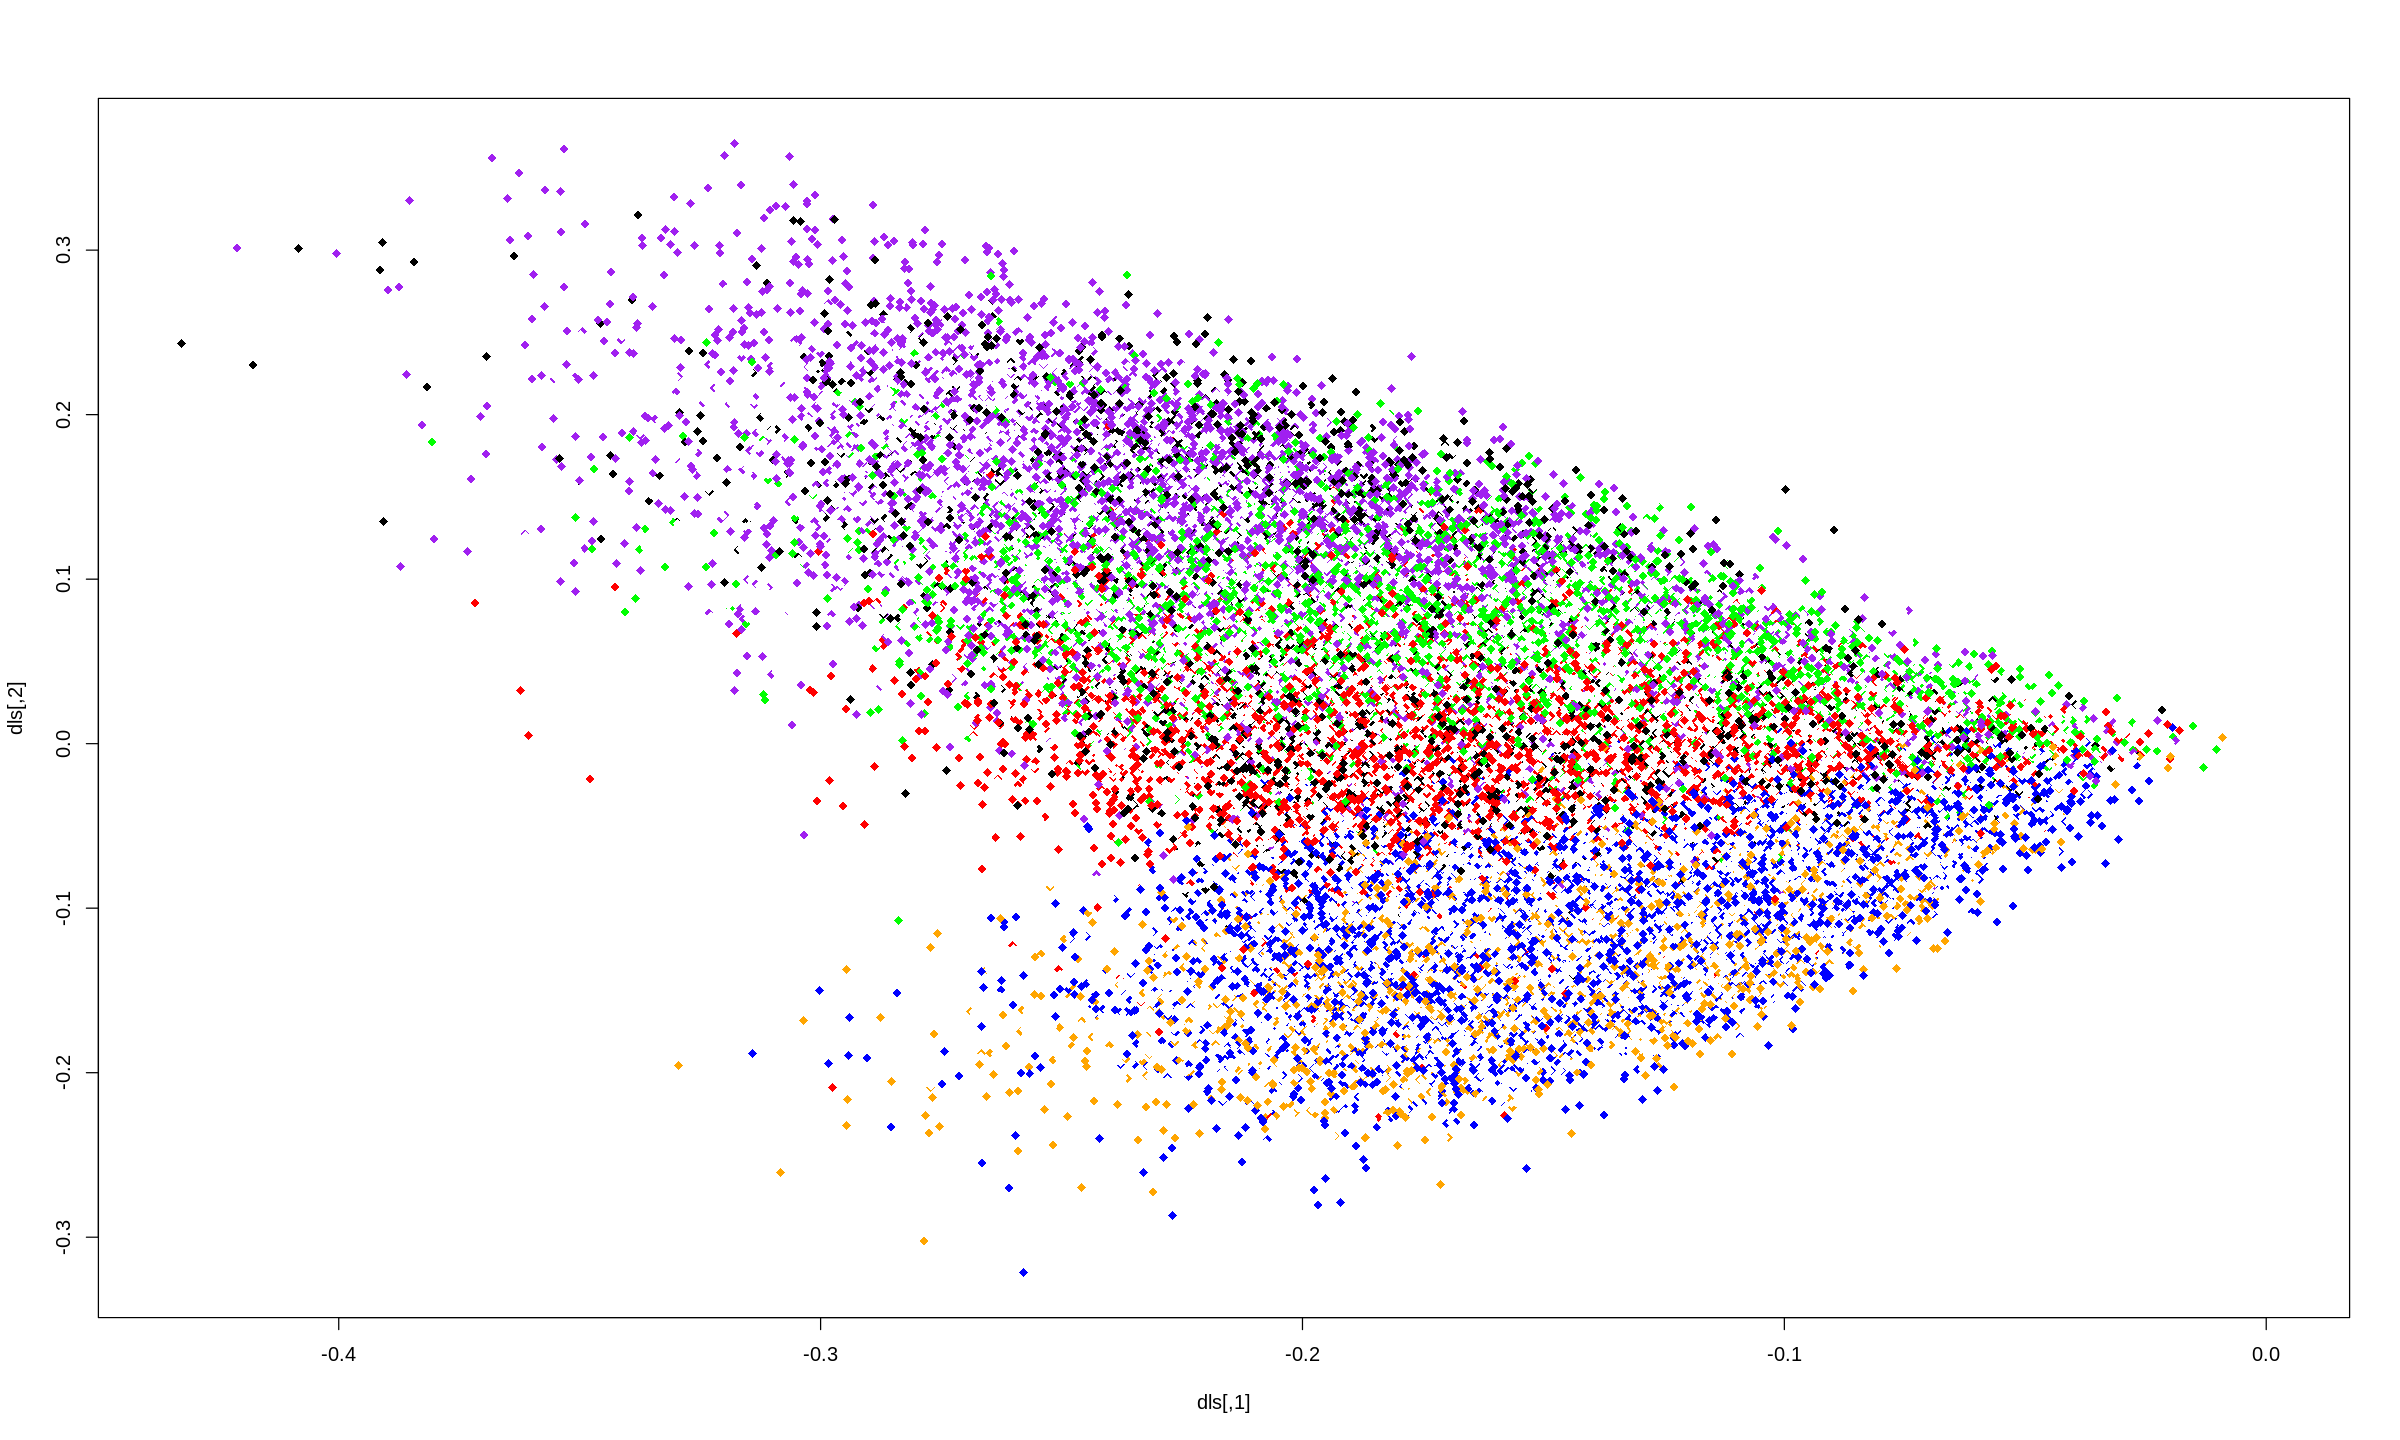

In [40]:
varietycolor <- function(x) switch(x, "Pinot Noir" = "red", "Chardonnay"="blue", "Cabernet Sauvignon"="green", "Red Blend"="purple", "Bordeaux-style Red Blend"="black","Riesling" = "orange", "white")
damcols <- sapply(variety, varietycolor)
plot( dls, pch=18, cex=1, col=damcols )

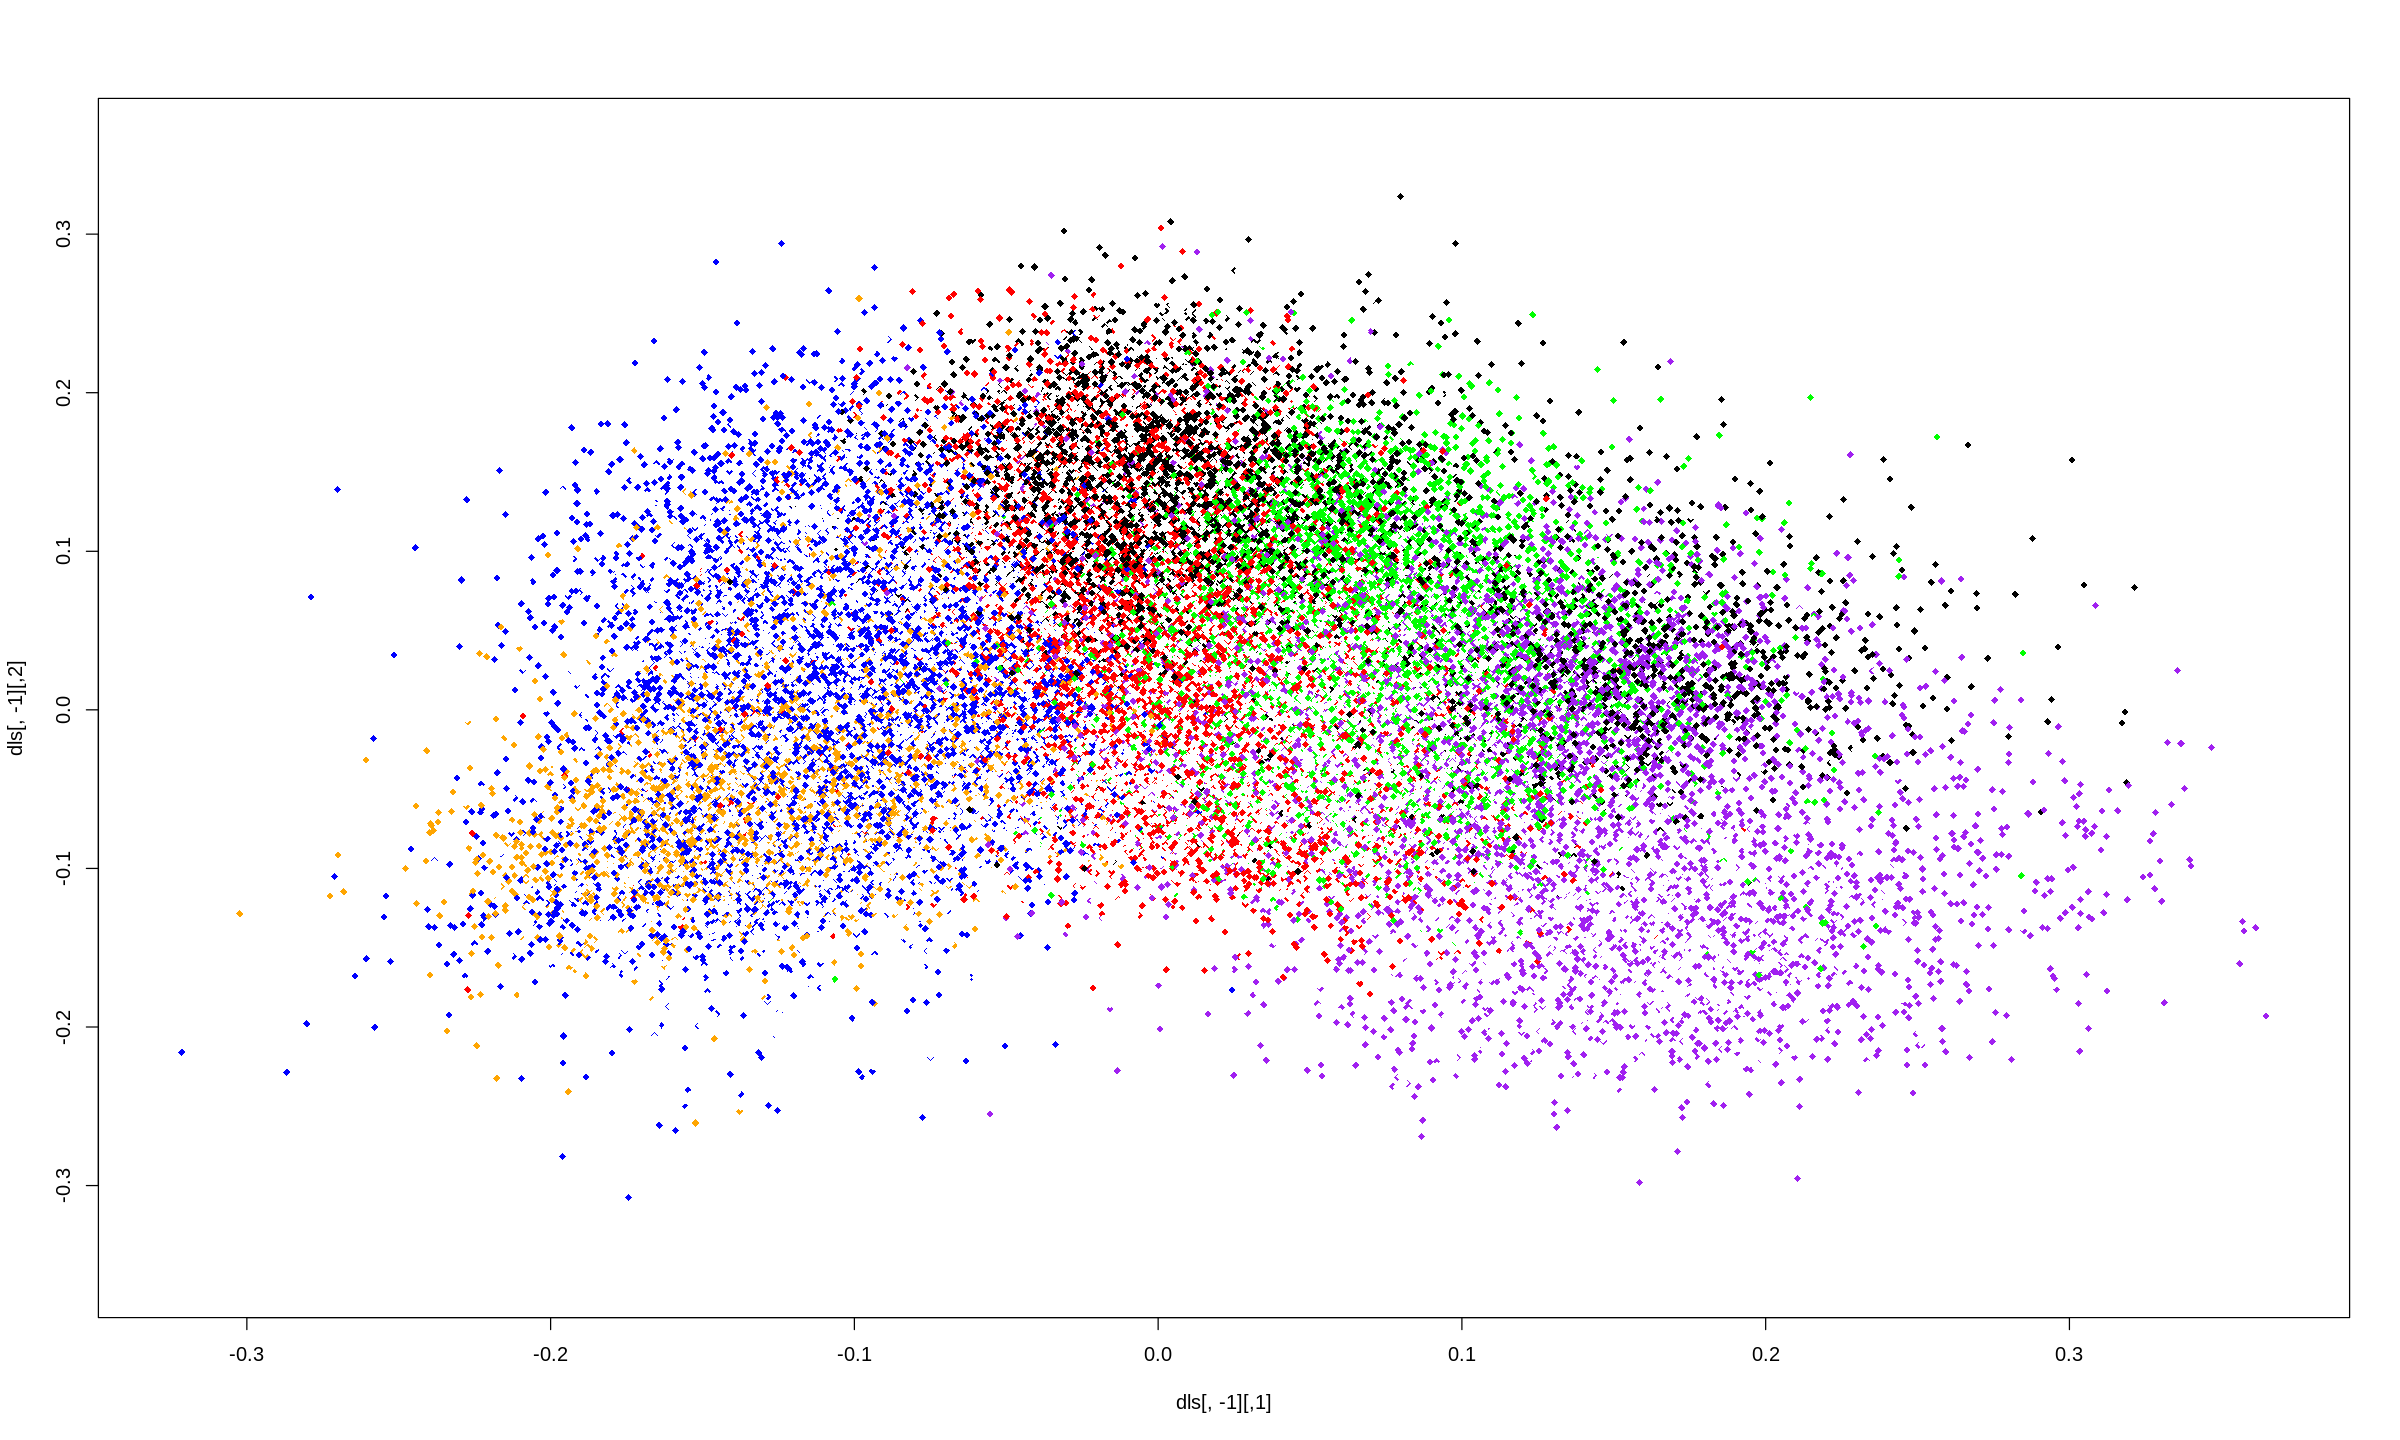

In [41]:
plot( dls[,-1], pch=18, cex=0.8, col=damcols )